**Versión base**: utiliza métodos de lectura de archivos para guardar la información de cada archivo en una estructura de datos de Python, de manera que se respete el orden y la categoría de los datos.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** y llámala dentro de un ciclo para automatizar la lectura de los archivos.

Los archivos con los que cuentas son:

* `"edad.txt"`: un archivo con la edad de cada persona encuestada;
* `"escolaridad.txt"`: un archivo con el nivel de escolaridad de cada persona encuestada;
* `"estado_civil.txt"`: un archivo con el estado civil de cada persona encuestada;
* `"estrato.txt"`: un archivo con el estrato socioeconómico de cada persona encuestada;
* `"genero.txt"`: un archivo con el género de cada persona encuestada;
* `"promedio.txt"`: un archivo con el promedio académico de cada persona encuestada;
* `"region.txt"`: un archivo con la región de proveniencia de cada persona encuestada.

In [1]:
import pandas as pd

In [2]:
def lectura_archivos():
    #Creando listas de archivos
    archivos = ['edad','escolaridad','estado_civil','estrato','genero','promedio','region']
    rutas = []
    #Generando las rutas 
    for archivo in archivos:
        ruta_archivo = f'./Archivos/{archivo}.txt'
        rutas.append(ruta_archivo) 
    #Creando el diccionario para almacenar la información
    diccionario = {}
    #Ciclo para almacenar la información de los archivos en el diccionario
    for ruta in rutas:
        with open(ruta, 'r') as file:
            datos = []
            for linea in file:
                linea = linea[:-1]
                datos.append(linea)
        ruta = ruta[11:-4]
        diccionario[ruta] = datos
    
    return diccionario

In [3]:
df = pd.DataFrame(lectura_archivos())
df

,edad,escolaridad,estado_civil,estrato,genero,promedio,region
0,36,Secundaria,casada,5,masculino,2.4,Region_1
1,66,Profesional,divorciada,1,masculino,0.9,Region_1
2,24,Secundaria,divorciada,3,femenino,3.2,Region_2
3,55,Secundaria,casada,3,masculino,2.1,Region_2
4,26,Secundaria,divorciada,2,otro,2.1,Region_3
...,...,...,...,...,...,...,...
495,23,Secundaria,casada,5,femenino,2.1,Region_4
496,24,Secundaria,viuda,1,femenino,2.9,Region_1
497,50,Profesional,casada,1,no binario,2.1,Region_1
498,54,Secundaria,divorciada,2,femenino,2.7,Region_1


In [4]:
df['genero'].unique()

array(['masculino', 'femenino', 'otro', 'no binario'], dtype=object)

**Versión base**: calcula estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable relevante en el contexto del problema y repórtalas concluyendo acerca de las principales características de los datos.

**Versión completa**: complementa la **versión base** con visualizaciones informativas sobre los datos (ej., histogramas, gráficos de dispersión, boxplots, etc.), relevantes para el problema.

In [5]:
import math
import matplotlib.pyplot as plt

In [6]:
edades = []
varianzas = []
diccionario = lectura_archivos()

for dato in diccionario['edad']:
    numero = int(dato)
    edades.append(numero)

promedio_edad = sum(edades) / len(edades)

for edad in edades:
    dato = ((edad - promedio_edad)**2)
    varianzas.append(dato)
    
minimo_edad = min(edades)
maximo_edad = max(edades)
varianza_edad = math.sqrt(sum(varianzas)/len(edades))

print(f'Medida edad: {promedio_edad}')
print(f'Varianza edad (STD): {varianza_edad}')
print(f'Máxima edad: {maximo_edad}')
print(f'Mínima edad: {minimo_edad}')

Medida edad: 48.748
Varianza edad (STD): 18.59485133040864
Máxima edad: 80
Mínima edad: 18


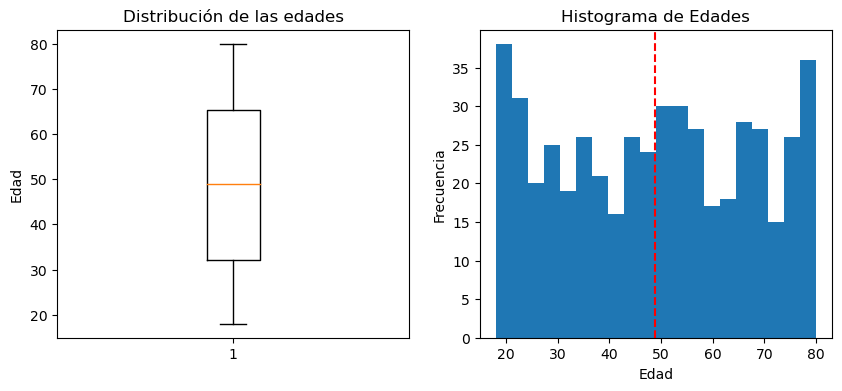

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(edades)
plt.title('Distribución de las edades')
plt.ylabel('Edad')
plt.subplot(1,2,2)
plt.hist(edades, bins=20)
plt.title('Histograma de Edades')
plt.ylabel('Frecuencia')
plt.xlabel('Edad')
plt.axvline(x=promedio_edad, color='red', linestyle='--', label='Media')
plt.show()

In [8]:
estratos = []
varianzas = []

for dato in diccionario['estrato']:
    numero = int(dato)
    estratos.append(numero)

promedio_estrato = sum(estratos) / len(estratos)

for estrato in estratos:
    dato = ((estrato - promedio_estrato)**2)
    varianzas.append(dato)
    
minimo_estrato = min(estratos)
maximo_estrato = max(estratos)
varianza_estrato = math.sqrt(sum(varianzas)/len(estratos))

print(f'Medida estrato: {promedio_estrato}')
print(f'Varianza estrato (STD): {varianza_estrato}')
print(f'Máximo estrato: {maximo_estrato}')
print(f'Mínima estrato: {minimo_estrato}')

Medida estrato: 2.308
Varianza estrato (STD): 0.9762868430947917
Máximo estrato: 5
Mínima estrato: 1


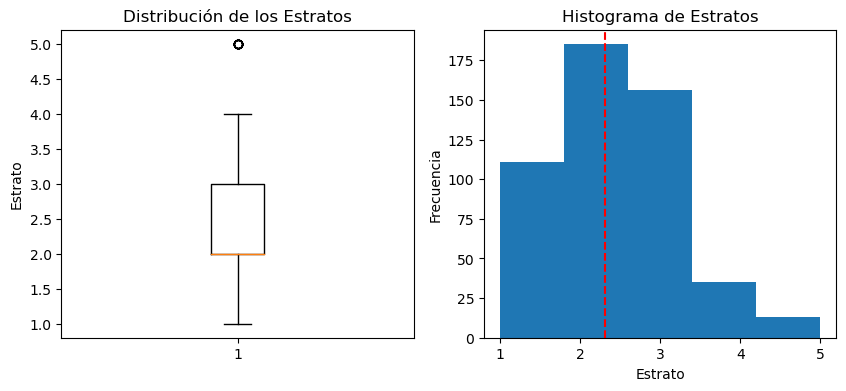

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(estratos)
plt.title('Distribución de los Estratos')
plt.ylabel('Estrato')
plt.subplot(1,2,2)
plt.hist(estratos, bins=5)
plt.title('Histograma de Estratos')
plt.ylabel('Frecuencia')
plt.xlabel('Estrato')
plt.axvline(x=promedio_estrato, color='red', linestyle='--', label='Media')
plt.show()

In [10]:
promedios = []
varianzas = []

for dato in diccionario['promedio']:
    numero = float(dato)
    promedios.append(numero)

promedio_promedio = sum(promedios) / len(promedios)

for promedio in promedios:
    dato = ((promedio - promedio_promedio)**2)
    varianzas.append(dato)
    
minimo_promedio = min(promedios)
maximo_promedio = max(promedios)
varianza_promedios = math.sqrt(sum(varianzas)/len(promedios))

print(f'Medida promedio: {promedio_promedio}')
print(f'Varianza promedio (STD): {varianza_promedios}')
print(f'Máximo promedio: {maximo_promedio}')
print(f'Mínima promedio: {minimo_promedio}')

Medida promedio: 2.6212000000000004
Varianza promedio (STD): 1.1159169144698917
Máximo promedio: 5.0
Mínima promedio: 0.0


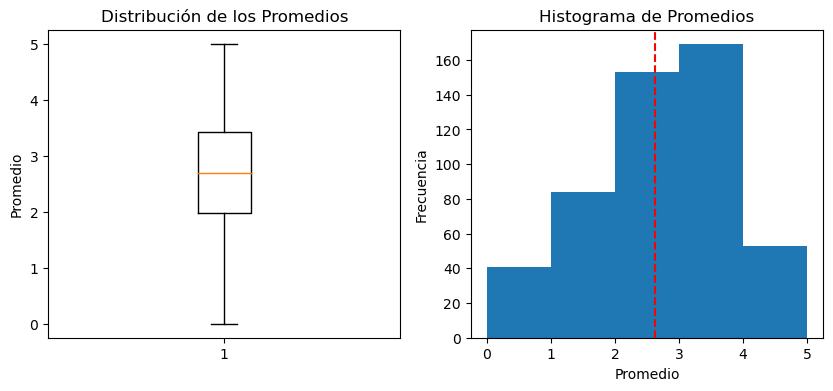

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.boxplot(promedios)
plt.title('Distribución de los Promedios')
plt.ylabel('Promedio')
plt.subplot(1,2,2)
plt.hist(promedios, bins=5)
plt.title('Histograma de Promedios')
plt.ylabel('Frecuencia')
plt.xlabel('Promedio')
plt.axvline(x=promedio_promedio, color='red', linestyle='--', label='Media')
plt.show()

* La primera propuesta sugiere que se deben tomar las diferentes regiones y géneros y, para cada una de las combinaciones de estos dos criterios, asignar una cantidad de becas proporcional al número de personas de esa subpoblación con respecto al total de personas encuestadas. Dentro de cada subpoblación, las becas deben aprobarse a las personas con mejor promedio académico.

In [12]:
#Generando un filtro por la región 1
region_filtro = 'Region_1'
columna_filtrada_genero = []
columna_filtrada_region= []
columna_filtrada_promedio = []
diccionario = lectura_archivos()

for i, valor in enumerate(diccionario['region']):
    if valor == region_filtro:
        columna_filtrada_genero.append(diccionario['genero'][i])
        columna_filtrada_region.append(diccionario['region'][i])
        columna_filtrada_promedio.append(diccionario['promedio'][i])
                
diccionario_region_1 = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero, 'promedio':columna_filtrada_promedio}

#Filtrando por genero masculino en la región 1
genero_filtro = 'masculino'
columna_filtrada_genero = []
columna_filtrada_region= []
columna_filtrada_promedio = []

for i, valor in enumerate(diccionario_region_1['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_1['genero'][i])
        columna_filtrada_region.append(diccionario_region_1['region'][i])
        columna_filtrada_promedio.append(diccionario_region_1['promedio'][i])

        
diccionario_region_1_masculino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero, 'promedio':columna_filtrada_promedio}

#Filtrando por genero femenino en la región 1
genero_filtro = 'femenino'
columna_filtrada_genero = []
columna_filtrada_region= []
columna_filtrada_promedio = []

for i, valor in enumerate(diccionario_region_1['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_1['genero'][i])
        columna_filtrada_region.append(diccionario_region_1['region'][i])
        columna_filtrada_promedio.append(diccionario_region_1['promedio'][i])
        
diccionario_region_1_femenino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero, 'promedio':columna_filtrada_promedio}

#Filtrando por genero no binario en la región 1
genero_filtro = 'no binario'
columna_filtrada_genero = []
columna_filtrada_region= []
columna_filtrada_promedio = []

for i, valor in enumerate(diccionario_region_1['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_1['genero'][i])
        columna_filtrada_region.append(diccionario_region_1['region'][i])
        columna_filtrada_promedio.append(diccionario_region_1['promedio'][i])
        
diccionario_region_1_binario = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero, 'promedio':columna_filtrada_promedio}

#Filtrando por genero otro en la región 1
genero_filtro = 'otro'
columna_filtrada_genero = []
columna_filtrada_region= []
columna_filtrada_promedio = []

for i, valor in enumerate(diccionario_region_1['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_1['genero'][i])
        columna_filtrada_region.append(diccionario_region_1['region'][i])
        columna_filtrada_promedio.append(diccionario_region_1['promedio'][i])
        
diccionario_region_1_otro = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero, 'promedio':columna_filtrada_promedio}

R1 = len(diccionario_region_1['genero'])
R1_masculino = len(diccionario_region_1_masculino['genero'])
R1_femenino = len(diccionario_region_1_femenino['genero'])
R1_binario = len(diccionario_region_1_binario['genero'])
R1_otro = len(diccionario_region_1_otro['genero'])

In [13]:
#Filtrando por promedio masculino en la región 1
promedio_filtro = 4
columna_filtrada_genero = []
columna_filtrada_region= []
columna_filtrada_promedio = []

for i, valor in enumerate(diccionario_region_1_masculino['promedio']):
    valor = float(valor)
    if valor >= promedio_filtro:
        columna_filtrada_genero.append(diccionario_region_1_masculino['genero'][i])
        columna_filtrada_region.append(diccionario_region_1_masculino['region'][i])
        columna_filtrada_promedio.append(diccionario_region_1_masculino['promedio'][i])
        
diccionario_r1_masculino_promedio = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero, 'promedio':columna_filtrada_promedio}

In [14]:
df_2 = pd.DataFrame(diccionario_r1_masculino_promedio)
df_2

,region,genero,promedio
0,Region_1,masculino,4.5
1,Region_1,masculino,4.9
2,Region_1,masculino,4.4
3,Region_1,masculino,4.0
4,Region_1,masculino,4.8
5,Region_1,masculino,4.3
6,Region_1,masculino,4.2
7,Region_1,masculino,4.5


In [15]:
#Generando un filtro por la región 2
region_filtro = 'Region_2'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario['region']):
    if valor == region_filtro:
        columna_filtrada_genero.append(diccionario['genero'][i])
        columna_filtrada_region.append(diccionario['region'][i])
        
diccionario_region_2 = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero masculino en la región 2
genero_filtro = 'masculino'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_2['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_2['genero'][i])
        columna_filtrada_region.append(diccionario_region_2['region'][i])
        
diccionario_region_2_masculino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero femenino en la región 2
genero_filtro = 'femenino'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_2['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_2['genero'][i])
        columna_filtrada_region.append(diccionario_region_2['region'][i])
        
diccionario_region_2_femenino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero no binario en la región 2
genero_filtro = 'no binario'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_2['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_2['genero'][i])
        columna_filtrada_region.append(diccionario_region_2['region'][i])
        
diccionario_region_2_binario = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero otro en la región 2
genero_filtro = 'otro'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_2['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_2['genero'][i])
        columna_filtrada_region.append(diccionario_region_2['region'][i])
        
diccionario_region_2_otro = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

R2 = len(diccionario_region_2['genero'])
R2_masculino = len(diccionario_region_2_masculino['genero'])
R2_femenino = len(diccionario_region_2_femenino['genero'])
R2_binario = len(diccionario_region_2_binario['genero'])
R2_otro = len(diccionario_region_2_otro['genero'])

In [16]:
#Generando un filtro por la región 3
region_filtro = 'Region_3'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario['region']):
    if valor == region_filtro:
        columna_filtrada_genero.append(diccionario['genero'][i])
        columna_filtrada_region.append(diccionario['region'][i])
        
diccionario_region_3 = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero masculino en la región 3
genero_filtro = 'masculino'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_3['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_3['genero'][i])
        columna_filtrada_region.append(diccionario_region_3['region'][i])
        
diccionario_region_3_masculino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero femenino en la región 3
genero_filtro = 'femenino'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_3['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_3['genero'][i])
        columna_filtrada_region.append(diccionario_region_3['region'][i])
        
diccionario_region_3_femenino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero no binario en la región 3
genero_filtro = 'no binario'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_3['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_3['genero'][i])
        columna_filtrada_region.append(diccionario_region_3['region'][i])
        
diccionario_region_3_binario = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero otro en la región 3
genero_filtro = 'otro'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_3['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_3['genero'][i])
        columna_filtrada_region.append(diccionario_region_3['region'][i])
        
diccionario_region_3_otro = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

R3 = len(diccionario_region_3['genero'])
R3_masculino = len(diccionario_region_3_masculino['genero'])
R3_femenino = len(diccionario_region_3_femenino['genero'])
R3_binario = len(diccionario_region_3_binario['genero'])
R3_otro = len(diccionario_region_3_otro['genero'])

In [17]:
#Generando un filtro por la región 4
region_filtro = 'Region_4'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario['region']):
    if valor == region_filtro:
        columna_filtrada_genero.append(diccionario['genero'][i])
        columna_filtrada_region.append(diccionario['region'][i])
        
diccionario_region_4 = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero masculino en la región 4
genero_filtro = 'masculino'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_4['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_4['genero'][i])
        columna_filtrada_region.append(diccionario_region_4['region'][i])
        
diccionario_region_4_masculino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero femenino en la región 4
genero_filtro = 'femenino'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_4['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_4['genero'][i])
        columna_filtrada_region.append(diccionario_region_4['region'][i])
        
diccionario_region_4_femenino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero no binario en la región 4
genero_filtro = 'no binario'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_4['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_4['genero'][i])
        columna_filtrada_region.append(diccionario_region_4['region'][i])
        
diccionario_region_4_binario = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero otro en la región 4
genero_filtro = 'otro'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_4['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_4['genero'][i])
        columna_filtrada_region.append(diccionario_region_4['region'][i])
        
diccionario_region_4_otro = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

R4 = len(diccionario_region_4['genero'])
R4_masculino = len(diccionario_region_4_masculino['genero'])
R4_femenino = len(diccionario_region_4_femenino['genero'])
R4_binario = len(diccionario_region_4_binario['genero'])
R4_otro = len(diccionario_region_4_otro['genero'])

In [18]:
#Generando un filtro por la región 5
region_filtro = 'Region_5'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario['region']):
    if valor == region_filtro:
        columna_filtrada_genero.append(diccionario['genero'][i])
        columna_filtrada_region.append(diccionario['region'][i])
        
diccionario_region_5 = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero masculino en la región 5
genero_filtro = 'masculino'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_5['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_5['genero'][i])
        columna_filtrada_region.append(diccionario_region_5['region'][i])
        
diccionario_region_5_masculino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero femenino en la región 5
genero_filtro = 'femenino'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_5['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_5['genero'][i])
        columna_filtrada_region.append(diccionario_region_5['region'][i])
        
diccionario_region_5_femenino = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero no binario en la región 5
genero_filtro = 'no binario'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_5['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_5['genero'][i])
        columna_filtrada_region.append(diccionario_region_5['region'][i])
        
diccionario_region_5_binario = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

#Filtrando por genero otro en la región 5
genero_filtro = 'otro'
columna_filtrada_genero = []
columna_filtrada_region= []

for i, valor in enumerate(diccionario_region_5['genero']):
    if valor == genero_filtro:
        columna_filtrada_genero.append(diccionario_region_5['genero'][i])
        columna_filtrada_region.append(diccionario_region_5['region'][i])
        
diccionario_region_5_otro = {'region':columna_filtrada_region, 'genero':columna_filtrada_genero}

R5 = len(diccionario_region_5['genero'])
R5_masculino = len(diccionario_region_5_masculino['genero'])
R5_femenino = len(diccionario_region_5_femenino['genero'])
R5_binario = len(diccionario_region_5_binario['genero'])
R5_otro = len(diccionario_region_5_otro['genero'])

In [19]:
#Calculando proporciones para cada subpoblación
N = 20
total = len(diccionario['region'])

#Región 1
prop_R1_masculino = R1_masculino/total
prop_R1_femenino = R1_femenino/total
prop_R1_binario = R1_binario/total
prop_R1_otro = R1_otro/total

#Región 2
prop_R2_masculino = R2_masculino/total
prop_R2_femenino = R2_femenino/total
prop_R2_binario = R2_binario/total
prop_R2_otro = R2_otro/total

#Región 3
prop_R3_masculino = R3_masculino/total
prop_R3_femenino = R3_femenino/total
prop_R3_binario = R3_binario/total
prop_R3_otro = R3_otro/total

#Región 4
prop_R4_masculino = R4_masculino/total
prop_R4_femenino = R4_femenino/total
prop_R4_binario = R4_binario/total
prop_R4_otro = R4_otro/total

#Región 5
prop_R5_masculino = R5_masculino/total
prop_R5_femenino = R5_femenino/total
prop_R5_binario = R5_binario/total
prop_R5_otro = R5_otro/total

print('PROPORCIONES REGIÓN 1')
print(f'Proporción de hombres en Región 1: {prop_R1_masculino}')
print(f'Proporción de mujeres en Región 1: {prop_R1_femenino}')
print(f'Proporción de no binarios en Región 1: {prop_R1_binario}')
print(f'Proporción de otros en Región 1: {prop_R1_otro}')

print('PROPORCIONES REGIÓN 2')
print(f'Proporción de hombres en Región 2: {prop_R2_masculino}')
print(f'Proporción de mujeres en Región 2: {prop_R2_femenino}')
print(f'Proporción de no binarios en Región 2: {prop_R2_binario}')
print(f'Proporción de otros en Región 2: {prop_R2_otro}')

print('PROPORCIONES REGIÓN 3')
print(f'Proporción de hombres en Región 3: {prop_R3_masculino}')
print(f'Proporción de mujeres en Región 3: {prop_R3_femenino}')
print(f'Proporción de no binarios en Región 3: {prop_R3_binario}')
print(f'Proporción de otros en Región 3: {prop_R3_otro}')

print('PROPORCIONES REGIÓN 4')
print(f'Proporción de hombres en Región 4: {prop_R4_masculino}')
print(f'Proporción de mujeres en Región 4: {prop_R4_femenino}')
print(f'Proporción de no binarios en Región 4: {prop_R4_binario}')
print(f'Proporción de otros en Región 4: {prop_R4_otro}')

print('PROPORCIONES REGIÓN 5')
print(f'Proporción de hombres en Región 5: {prop_R5_masculino}')
print(f'Proporción de mujeres en Región 5: {prop_R5_femenino}')
print(f'Proporción de no binarios en Región 5: {prop_R5_binario}')
print(f'Proporción de otros en Región 5: {prop_R5_otro}')

PROPORCIONES REGIÓN 1
Proporción de hombres en Región 1: 0.136
Proporción de mujeres en Región 1: 0.122
Proporción de no binarios en Región 1: 0.024
Proporción de otros en Región 1: 0.002
PROPORCIONES REGIÓN 2
Proporción de hombres en Región 2: 0.088
Proporción de mujeres en Región 2: 0.124
Proporción de no binarios en Región 2: 0.022
Proporción de otros en Región 2: 0.0
PROPORCIONES REGIÓN 3
Proporción de hombres en Región 3: 0.032
Proporción de mujeres en Región 3: 0.032
Proporción de no binarios en Región 3: 0.0
Proporción de otros en Región 3: 0.002
PROPORCIONES REGIÓN 4
Proporción de hombres en Región 4: 0.14
Proporción de mujeres en Región 4: 0.214
Proporción de no binarios en Región 4: 0.028
Proporción de otros en Región 4: 0.004
PROPORCIONES REGIÓN 5
Proporción de hombres en Región 5: 0.012
Proporción de mujeres en Región 5: 0.01
Proporción de no binarios en Región 5: 0.004
Proporción de otros en Región 5: 0.004
